In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.feature_selection import RFE
from datetime import datetime
import re
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

## Training Data

In [119]:
df = pd.read_csv("train (3).csv")
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [121]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


Data visualization


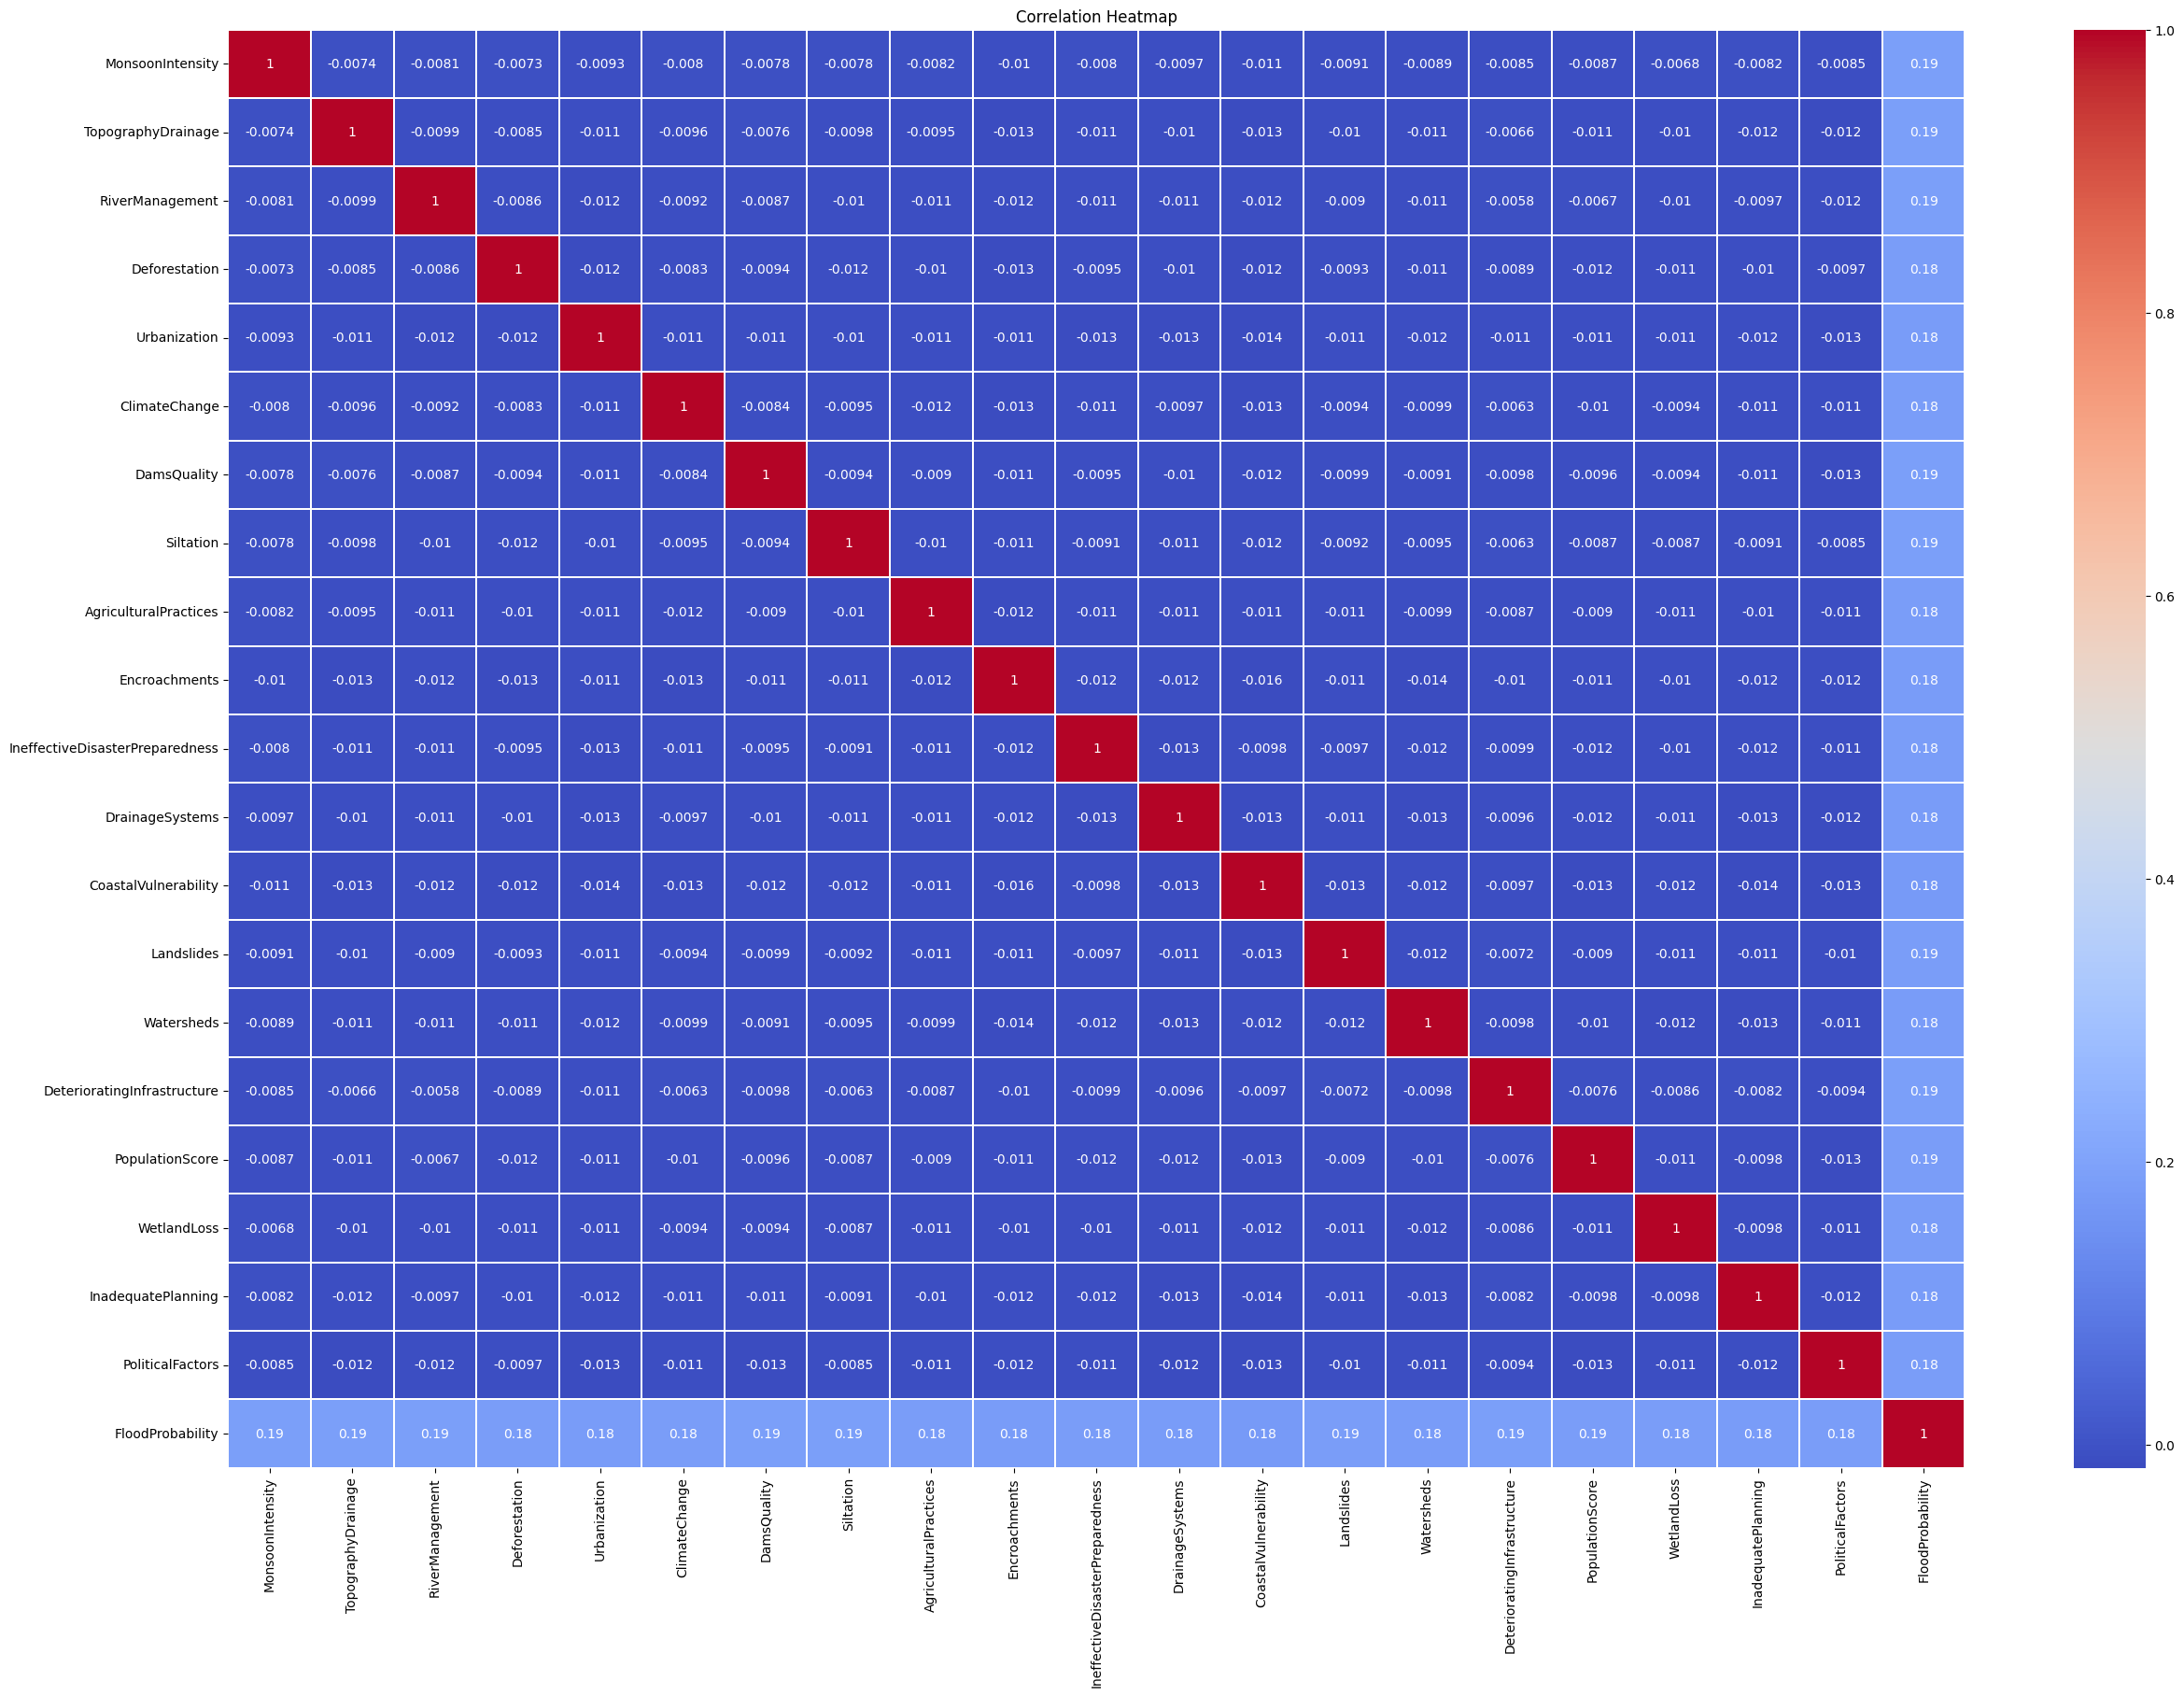

In [122]:
plt.figure(figsize=(30,20))
corr = df.drop('id',axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


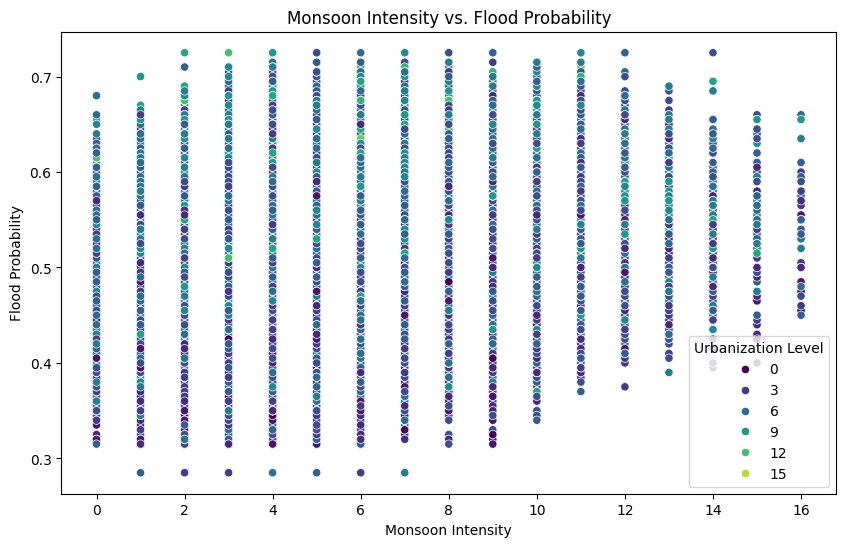

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonsoonIntensity', y='FloodProbability', hue='Urbanization', palette='viridis')
plt.title('Monsoon Intensity vs. Flood Probability')
plt.xlabel('Monsoon Intensity')
plt.ylabel('Flood Probability')
plt.legend(title='Urbanization Level')
plt.show()

/tmp/ipython-input-3468618417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TopographyDrainage', y='FloodProbability', palette='Set3')


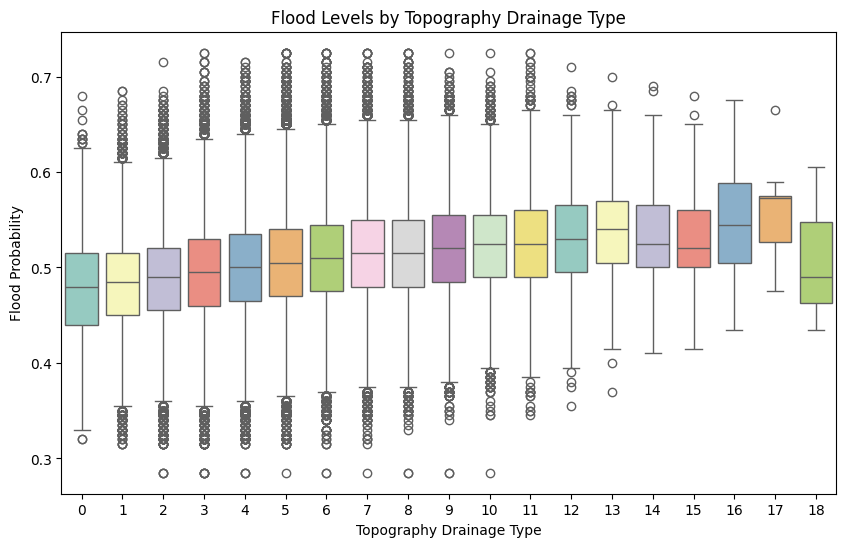

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TopographyDrainage', y='FloodProbability', palette='Set3')
plt.title('Flood Levels by Topography Drainage Type')
plt.xlabel('Topography Drainage Type')
plt.ylabel('Flood Probability')
plt.show()

/tmp/ipython-input-1569679799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='AgriculturalPractices', y='FloodProbability', palette='muted')


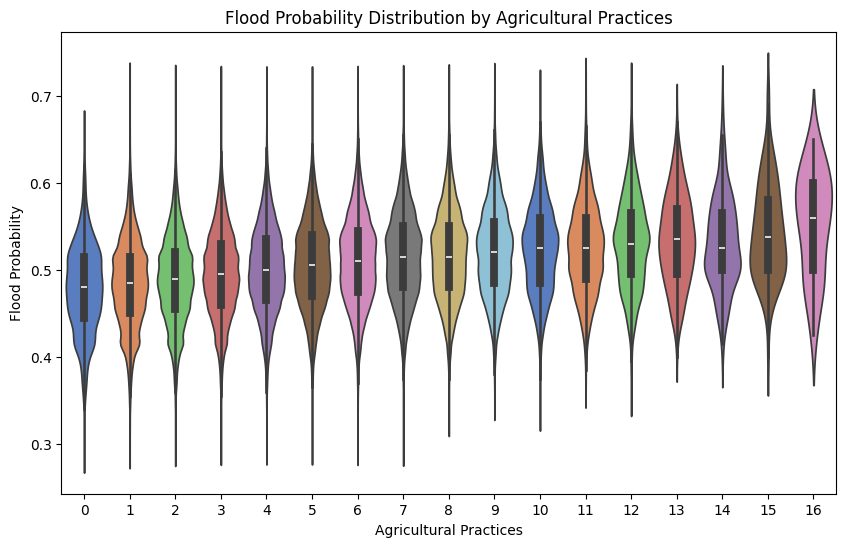

In [125]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='AgriculturalPractices', y='FloodProbability', palette='muted')
plt.title('Flood Probability Distribution by Agricultural Practices')
plt.xlabel('Agricultural Practices')
plt.ylabel('Flood Probability')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


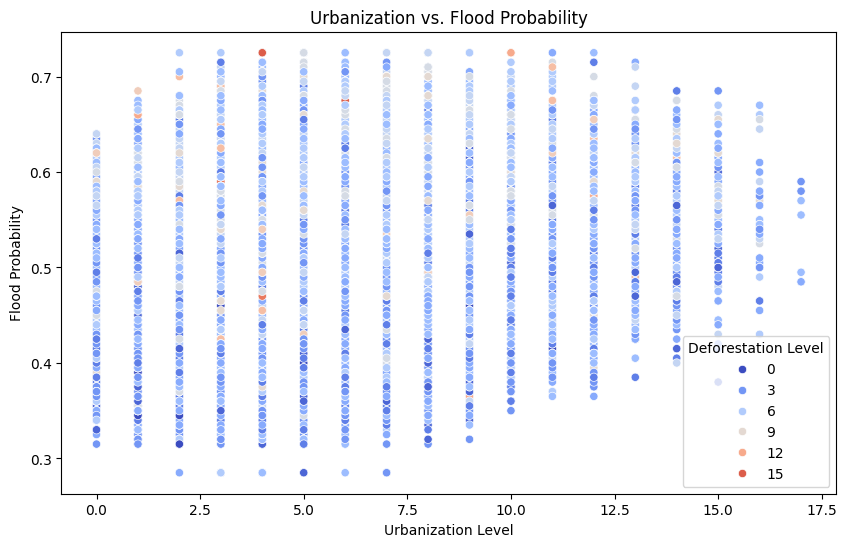

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Urbanization', y='FloodProbability', hue='Deforestation', palette='coolwarm')
plt.title('Urbanization vs. Flood Probability')
plt.xlabel('Urbanization Level')
plt.ylabel('Flood Probability')
plt.legend(title='Deforestation Level')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


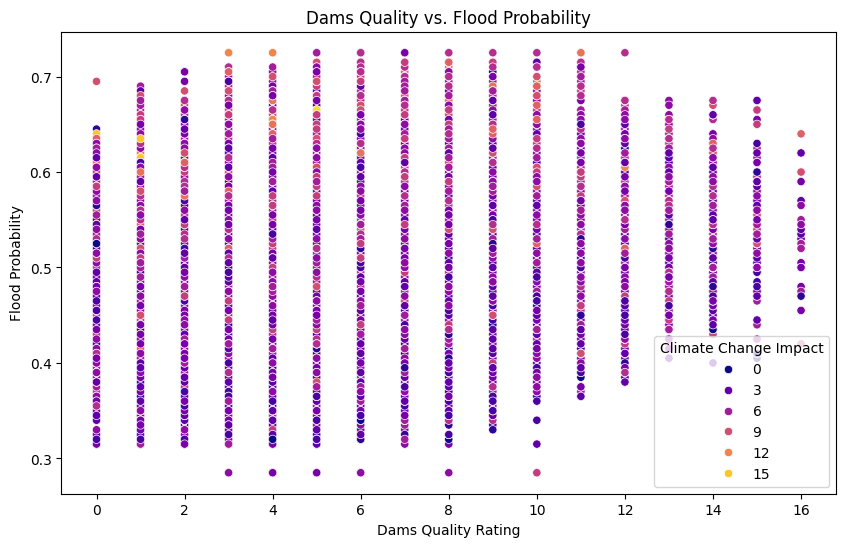

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DamsQuality', y='FloodProbability', hue='ClimateChange', palette='plasma')
plt.title('Dams Quality vs. Flood Probability')
plt.xlabel('Dams Quality Rating')
plt.ylabel('Flood Probability')
plt.legend(title='Climate Change Impact')
plt.show()

Preparing test data

In [128]:
x=df.drop(['id','FloodProbability'],axis=1)
y=df[['FloodProbability']]

In [129]:
x.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


Predictions

In [130]:
def train_regression_model(x, y):
    if isinstance(y, pd.DataFrame):
        y = y.squeeze()


    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'XGBoost': XGBRegressor()
    }

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"{model_name}:")
        print(f"  Mean Squared Error: {mse}")
        print(f"  Root Mean Squared Error: {rmse}")
        print(f"  Mean Absolute Error: {mae}")
        print(f"  R^2 Score: {r2}\n")

        # Plot residuals
        residuals = y_test - y_pred
        plt.figure(figsize=(12, 6))
        sns.histplot(residuals, bins=30, kde=True)
        plt.title(f'{model_name} Residuals Distribution')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.axvline(0, color='red', linestyle='--')
        plt.show()


Linear Regression:
  Mean Squared Error: 0.000403206587090558
  Root Mean Squared Error: 0.020080004658628893
  Mean Absolute Error: 0.01579247136376033
  R^2 Score: 0.8448773362840329



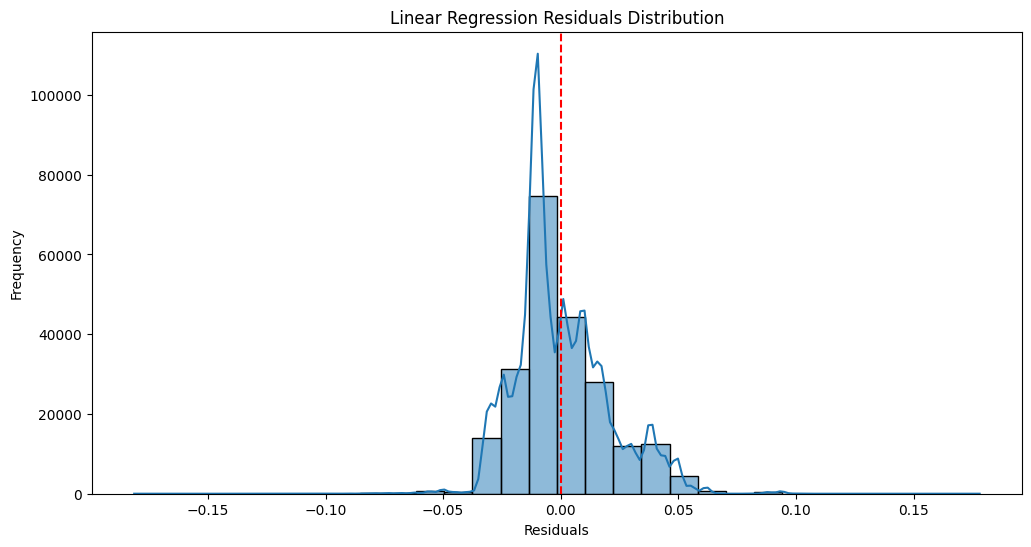

Ridge Regression:
  Mean Squared Error: 0.0004032065868085267
  Root Mean Squared Error: 0.0200800046516062
  Mean Absolute Error: 0.0157924723286931
  R^2 Score: 0.8448773363925367



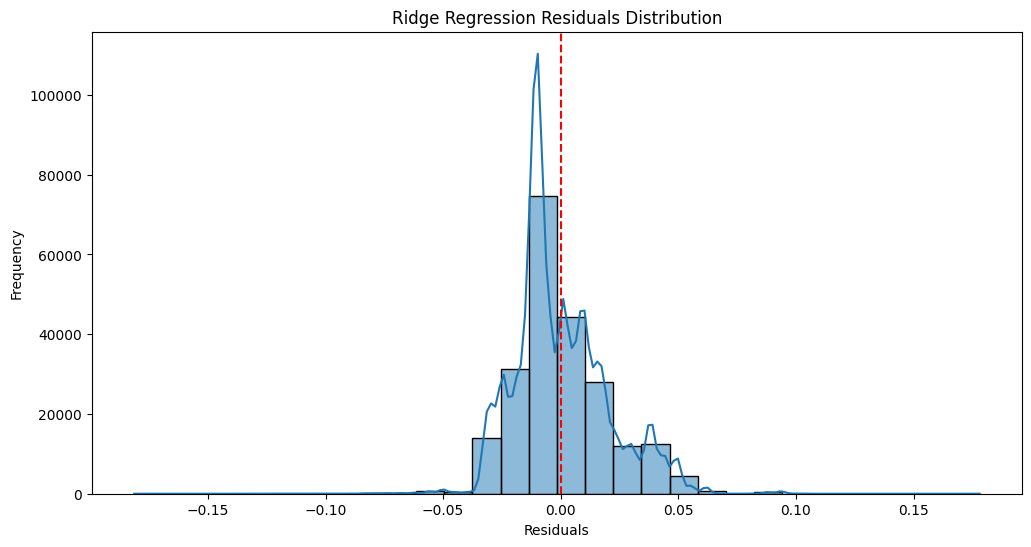

XGBoost:
  Mean Squared Error: 0.0004962876296730619
  Root Mean Squared Error: 0.02227751399220887
  Mean Absolute Error: 0.017587966576462263
  R^2 Score: 0.8090669608359393



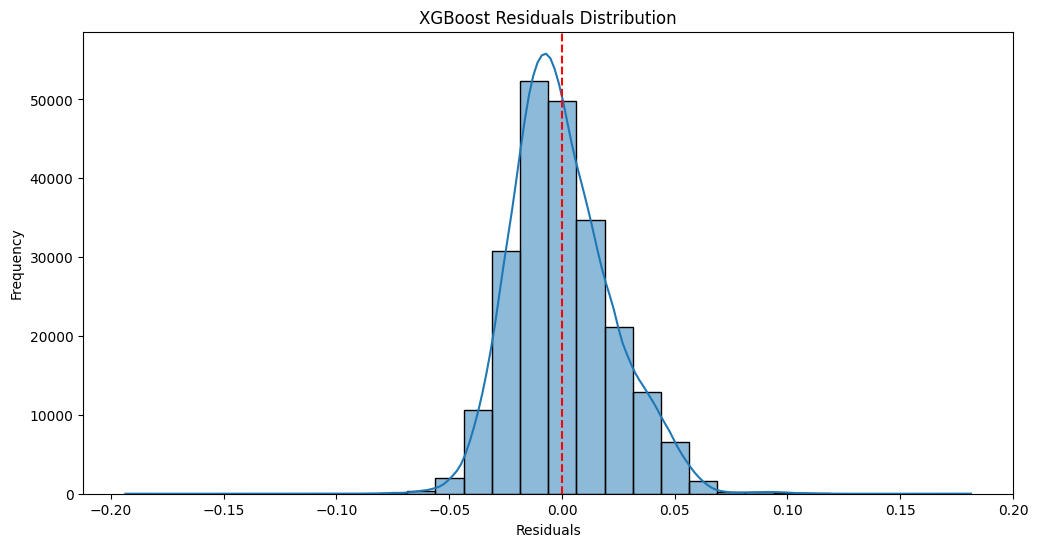

In [131]:
train_regression_model(x, y)


R2


In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

predict = model.predict(x_test)


r2 = r2_score(y_test, predict)
print(f" R^2 Score: {r2}")

 R^2 Score: 0.8448773362840329


Submission

## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

## Sample Submission File

In [135]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'


samplefile = pd.read_csv(sample_submission_url)

# Use the id from the sample submission file

submission_id = samplefile['id']

# Make predictions on the test features (X_test)

y_pred = model.predict(x_test)

# Create a submission DataFrame

submission_df = pd.DataFrame({

    'id': submission_id,

    'FloodProbability': pd.Series(y_pred.ravel())  # Flatten y_pred before converting to Series

})

# Save the submission DataFrame to a CSV file

submission_df.to_csv('submission_file.csv', index=False)

print("Submission file created: submission_file.csv")

print(submission_df.head())


Submission file created: submission_file.csv
        id  FloodProbability
0  1117957          0.533925
1  1117958          0.584911
2  1117959          0.522571
3  1117960          0.539378
4  1117961          0.579178
